In [2]:
import os 
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

if "__main__" == __name__:
'''
    file_path = "./clips/"
    data_dir = []
    data_set = []
    for root, dir, file in os.walk(top=file_path):
        for name in dir:
            data_dir.append(os.path.join(root, name))
        for name in file:
            data_set.append(os.path.join(root, name))
    print(data_set, data_dir)
'''

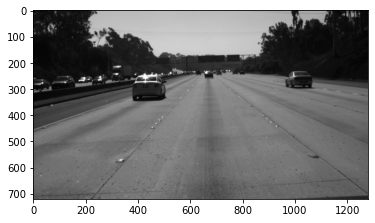

In [3]:
# Gray the image 

image = cv2.imread("./clips/0313-1/10000/1.jpg",1)
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

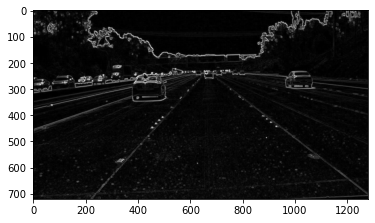

In [4]:
# calculate the gradient images
kernel_x = [[1,0,-1],[2,0,-2],[1,0,-1]]
kernel_y = [[1,2,1],[0,0,0],[-1,-2,-1]]

gradient_x = cv2.Sobel(image_gray, cv2.CV_32FC1, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image_gray, cv2.CV_32FC1, 0, 1, ksize=3)

gradient_mag = np.sqrt(np.power(gradient_x, 2)+np.power(gradient_y, 2))
gradient_dir = np.arctan2(gradient_x,gradient_y)

for i in  range(gradient_dir.shape[0]):
    for j in range(gradient_dir.shape[1]):
        if gradient_dir[i][j] > 0:
            gradient_dir[i][j] *= 180
            gradient_dir[i][j] /= 3.14
        elif gradient_dir[i][j] < 0:
            gradient_dir[i][j] = (gradient_dir[i][j]+3.14)*180/3.14

X = cv2.convertScaleAbs(gradient_x)
Y = cv2.convertScaleAbs(gradient_y)
 
sobel_image = cv2.addWeighted(X,0.4,Y,0.6,0)

plt.imshow(sobel_image, cmap="gray")
plt.show()

In [8]:
# create mag cell and dir cell in shape 8X8
cell_side = 8
cell_hori = int(gradient_mag.shape[1] / cell_side)
cell_vert = int(gradient_mag.shape[0] / cell_side)

cell_mag = np.zeros(shape=(cell_vert, cell_hori, cell_side, cell_side))
mag_cell_x = np.split(gradient_mag, cell_vert, axis=0)
for i in range(cell_vert):
    mag_cell_y = np.split(mag_cell_x[i], cell_hori, axis=1)
    for j in range(cell_hori):
        cell_mag[i][j] = mag_cell_y[j]

cell_dir = np.zeros(shape=(cell_vert, cell_hori, cell_side, cell_side))
dir_cell_x = np.split(gradient_mag, cell_vert, axis=0)
for i in range(cell_vert):
    dir_cell_y = np.split(dir_cell_x[i], cell_hori, axis=1)
    for j in range(cell_hori):
        cell_dir[i][j] = dir_cell_y[j]